<a href="https://colab.research.google.com/github/shyamikdas/TinyML/blob/main/tflite_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow is an open source machine learning library
!pip install tensorflow==2.17.1
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

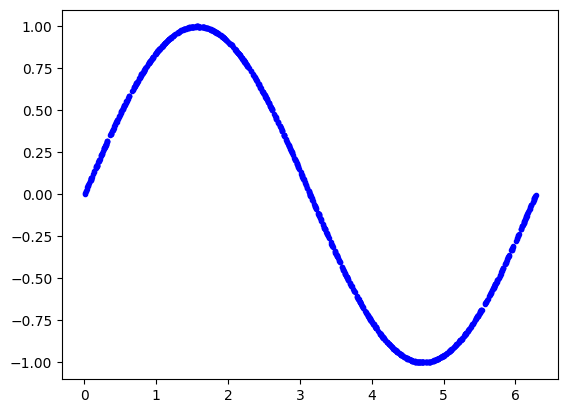

In [2]:
# We'll generate this many sample datapoints
SAMPLES = 1000
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)
# Calculate the corresponding sine values
y_values = np.sin(x_values)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

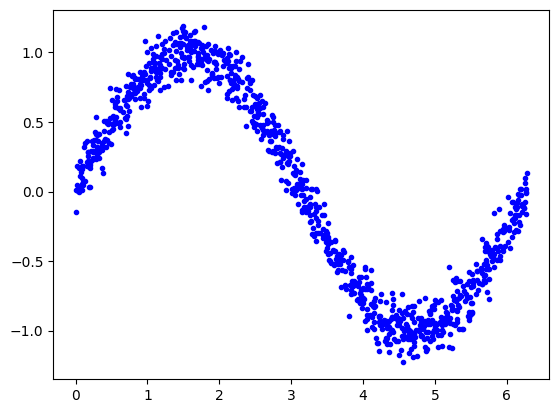

In [3]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

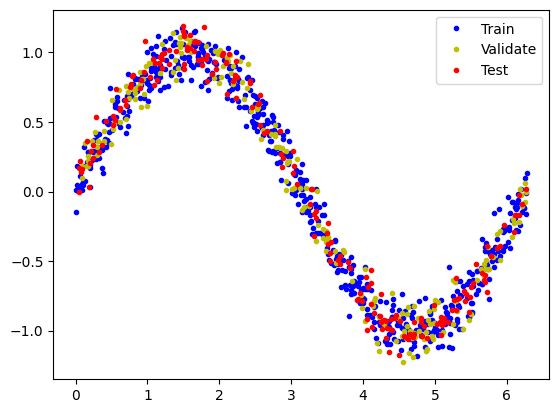

In [4]:
#SPLITTING DATA

# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()


In [5]:
# We'll use Keras to create a simple model architecture
from keras import layers
model_1 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons."
#The neurons decide whether to activate based on the 'relu' activationfunction.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print a summary of the model's architecture
model_1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,validation_data=(x_validate, y_validate))


Epoch 1/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.9362 - mae: 1.3544 - val_loss: 1.5528 - val_mae: 1.0603
Epoch 2/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2519 - mae: 0.9611 - val_loss: 0.7564 - val_mae: 0.7948
Epoch 3/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6317 - mae: 0.7228 - val_loss: 0.5478 - val_mae: 0.6546
Epoch 4/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4878 - mae: 0.6135 - val_loss: 0.4779 - val_mae: 0.6043
Epoch 5/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4306 - mae: 0.5707 - val_loss: 0.4237 - val_mae: 0.5666
Epoch 6/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3826 - mae: 0.5368 - val_loss: 0.3762 - val_mae: 0.5305
Epoch 7/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3404 - mae: 0.5069 - val_loss: 0.3346 - val_mae: 0.4978
Epoch 8/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3035 - mae: 0.4790 - val_loss: 0.2989 - val_mae: 0.4697
Epoch 9/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

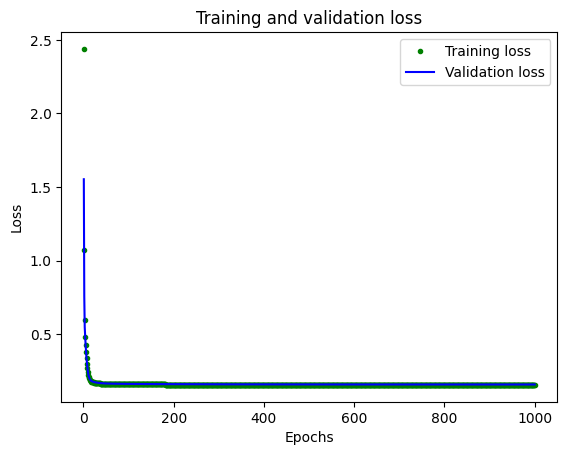

In [7]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons."
# Theneurons decide whether to activate based on the 'relu' activatio
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4098 - mae: 0.5525 - val_loss: 0.3715 - val_mae: 0.5272
Epoch 2/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3333 - mae: 0.5012 - val_loss: 0.3123 - val_mae: 0.4797
Epoch 3/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2811 - mae: 0.4610 - val_loss: 0.2626 - val_mae: 0.4392
Epoch 4/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2382 - mae: 0.4252 - val_loss: 0.2235 - val_mae: 0.4052
Epoch 5/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2051 - mae: 0.3959 - val_loss: 0.1959 - val_mae: 0.3796
Epoch 6/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1818 - mae: 0.3720 - val_loss: 0.1773 - val_mae: 0.3606
Epoch 7/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1663 - mae: 0.3531 - val_loss: 0.1651 - val_mae: 0.3465
Epoch 8/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1562 - mae: 0.3385 - val_loss: 0.1566 - val_mae: 0.3351
Epoch 9/600
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.149